In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
import get_data

In [3]:
all_data = get_data.get_data([2015, 2016])

In [4]:
sen_matrix = get_data.get_senators_matrix()

In [6]:
bills_matrix = get_data.get_vote_matrix()

In [8]:
bills_matrix.shape

(427, 100)

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


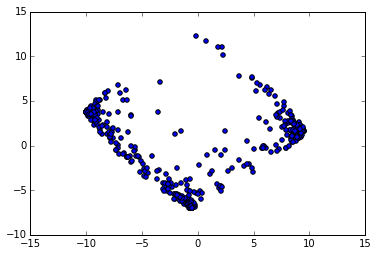

In [41]:
pca2 = PCA(2)
plot_columns = pca2.fit_transform(bills_matrix)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1])
plt.show()

In [15]:
np.sum(bills_matrix, axis=0)

array([ 149,   21,  129,   79,  159,  197,  157,   93,   89,  127,  109,
         21,  177,  175,  129,   89,  163,  131,   55,  147,  127,   67,
         87,   23,  135,   95,   87,   63,  101,   89,   97,  101,  133,
         69,  153,  175,  105,   99,  165,  155,   61,   95,  103,  193,
        -85,   77,   91,   45,  149,  163,  133,   83,   91,  181,  141,
         75,  119,  101,   99,  107,   93,  121,  151,  153,  101,  107,
         85,   89,  127,   71,  149,   91,  109,  145,  161,  109,   99,
        105,  -81,   23,  197,  171,    7,  169,   99,   89,   67,  109,
        137,  169,  127, -121,  125,   77,  127,   97,  159,  153,  169,
         71])

In [39]:
passed_bills = [ i for i in bills_matrix if sum(i) > 0]
unpassed_bills = [i for i in bills_matrix if sum(i) <= 0]

In [40]:
len(passed_bills), len(unpassed_bills)

(294, 133)

In [21]:
x = np.random.random((4,4))

In [30]:
x = np.matrix(x)

In [32]:
x

matrix([[ 0.75010349,  0.31358037,  0.56137357,  0.34541393],
        [ 0.07866783,  0.39672444,  0.77769416,  0.39999297],
        [ 0.21204906,  0.45244999,  0.41048007,  0.87765831],
        [ 0.3040224 ,  0.78774633,  0.24777686,  0.48908834]])

In [36]:
x[[1,2]][:, [1,2]]

matrix([[ 0.39672444,  0.77769416],
        [ 0.45244999,  0.41048007]])

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


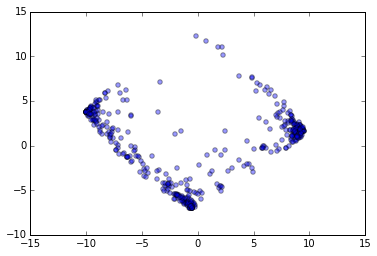

In [71]:
pca2 = PCA(2)
plot_columns = pca2.fit_transform(bills_matrix)
plt.scatter(plot_columns[:, 0], plot_columns[:, 1], alpha=0.4)
#plt.scatter(x=plot_columns[unpassed_bills][:, 0], y=plot_columns[unpassed_bills][:,1], c='b')
#plt.show()

In [72]:
passed = np.zeros((len(passed_bills), plot_columns.shape[1]))
not_passed = np.zeros((len(unpassed_bills), plot_columns.shape[1]))

In [82]:
passed_row = []
unpassed_row = []
for i in range(bills_matrix.shape[0]):
    if sum(bills_matrix[i, :]) > 0:
        passed_row.append(i)
    else:
        unpassed_row.append(i)

In [84]:
len(passed_row)

294

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


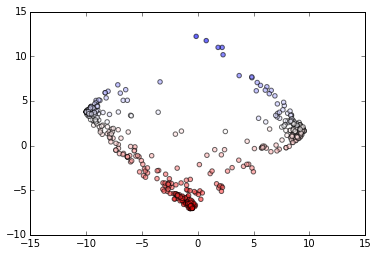

In [93]:
pca2 = PCA(2)
plot_columns = pca2.fit_transform(bills_matrix)
#plt.scatter(plot_columns[passed_row, 0], plot_columns[passed_row, 1], c=np.zeros(len(passed_row)), cmap='bwr', alpha=0.4)
#plt.scatter(plot_columns[unpassed_row, 0], plot_columns[unpassed_row, 1], c=np.ones(len(unpassed_row)), cmap='bwr', alpha=0.4)
plt.scatter(plot_columns[:, 0], plot_columns[:, 1], c=np.sum(bills_matrix, axis=1), cmap='bwr', alpha=0.6)

#plt.scatter(x=plot_columns[unpassed_bills][:, 0], y=plot_columns[unpassed_bills][:,1], c='b')
#plt.show()

In [96]:
all_data = all_data.sort_index(by='party')

In [103]:
print("Number of democrats:" , len(all_data[all_data['party'] == 'D']))

Number of democrats: 44


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


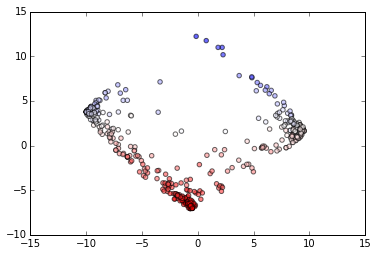

In [111]:
pca2 = PCA(2)
plot_columns = pca2.fit_transform(bills_matrix)
#plt.scatter(plot_columns[passed_row, 0], plot_columns[passed_row, 1], c=np.zeros(len(passed_row)), cmap='bwr', alpha=0.4)
#plt.scatter(plot_columns[unpassed_row, 0], plot_columns[unpassed_row, 1], c=np.ones(len(unpassed_row)), cmap='bwr', alpha=0.4)
plt.scatter(plot_columns[:, 0], plot_columns[:, 1], c=np.sum(bills_matrix[:, :44], axis=1)/44, cmap='bwr', alpha=0.6)

#plt.scatter(x=plot_columns[unpassed_bills][:, 0], y=plot_columns[unpassed_bills][:,1], c='b')
#plt.show()

In [112]:
bills_matrix[:, :44].shape

(427, 44)

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


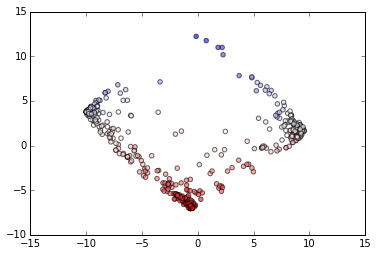

In [113]:
plt.scatter(plot_columns[:, 0], plot_columns[:, 1], c=np.sum(bills_matrix[:, 44:], axis=1)/56, cmap='bwr', alpha=0.6)


In [118]:
sum(bills_matrix[0])

-38

In [120]:
sum(bills_matrix[0] == 1)

31

In [132]:
dem_votes_matrix = bills_matrix[:, :46]
repub_votes_matrix = bills_matrix[:, 46:]
num_dems = 46
num_repubcs = 54
dem_liked_bills = []
dem_disliked_bills = []
repub_liked_bills = []
repub_disliked_bills = []
for i in range(bills_matrix.shape[0]):
    if sum(dem_votes_matrix[i]) > 0:
        dem_liked_bills.append(i)
    else:
        dem_disliked_bills.append(i)
    if sum(repub_votes_matrix[i]) > 0:
        repub_liked_bills.append(i)
    else:
        repub_disliked_bills.append(i)

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


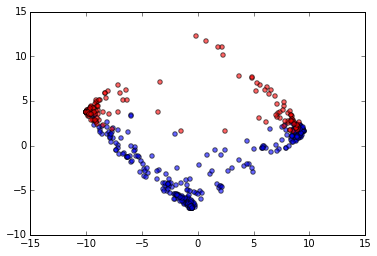

In [133]:
plt.scatter(plot_columns[dem_liked_bills, 0], plot_columns[dem_liked_bills, 1], c='b', alpha=0.6)
plt.scatter(plot_columns[dem_disliked_bills, 0], plot_columns[dem_disliked_bills, 1], c='r', alpha=0.6)

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


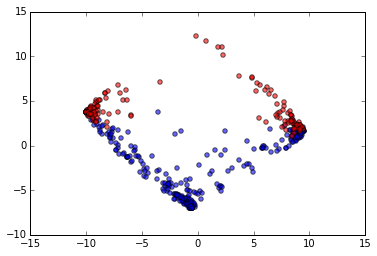

In [134]:
plt.scatter(plot_columns[repub_liked_bills, 0], plot_columns[repub_liked_bills, 1], c='b', alpha=0.6)
plt.scatter(plot_columns[repub_disliked_bills, 0], plot_columns[repub_disliked_bills, 1], c='r', alpha=0.6)

In [136]:
set_repub_no = set(repub_disliked_bills)
set_dem_no = set(dem_disliked_bills)

In [138]:
len(set_repub_no.intersection(set_dem_no))

115

In [139]:
set_repub_yes = set(repub_liked_bills)
set_dem_yes = set(dem_liked_bills)
print(len(set_repub_yes.intersection(set_dem_yes)))

258


In [140]:
disagree_dy_rn = []
agree_dy_ry = []
agree_dn_rn = []
disagree_dn_ry = []

for i in range(bills_matrix.shape[0]):
    if i in set_repub_no and i in set_dem_yes:
        disagree_dy_rn.append(i)
    if i in set_repub_no and i in set_dem_no:
        agree_dn_rn.append(i)
    if i in set_repub_yes and i in set_dem_no:
        disagree_dn_ry.append(i)
    if i in set_repub_yes and i in set_dem_yes:
        agree_dy_ry.append(i)

In [141]:
len(disagree_dy_rn) + len(disagree_dn_ry) + len(agree_dy_ry) + len(agree_dn_rn)

427

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


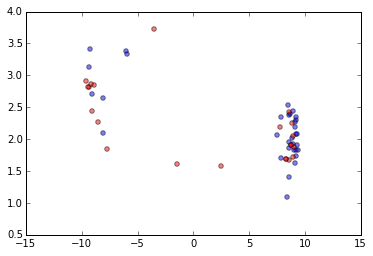

In [154]:
plt.scatter(plot_columns[disagree_dy_rn, 0], plot_columns[disagree_dy_rn, 1], c='b', alpha=0.5)
plt.scatter(plot_columns[disagree_dn_ry, 0], plot_columns[disagree_dn_ry, 1], c='r', alpha=0.5)
#plt.scatter(plot_columns[agree_dy_ry, 0], plot_columns[agree_dy_ry, 1], c='g', alpha=0.5)
#plt.scatter(plot_columns[agree_dn_rn, 0], plot_columns[agree_dn_rn, 1], c='orange', alpha=0.5)


In [148]:
len(agree_dn_rn)

115

In [149]:
agree_dn_rn[:5]

[0, 7, 11, 21, 27]

In [153]:
np.sum(bills_matrix[agree_dn_rn[:5]], axis=1)

array([-38, -18,   0, -14,  -2])

In [155]:
disagree = disagree_dy_rn + disagree_dn_ry
agree = agree_dn_rn + agree_dy_ry

In [156]:
len(disagree)

54

In [157]:
np.sum(bills_matrix[disagree, :], axis=1)

array([ 2,  4,  0,  0,  2,  6,  4,  2, -2,  2,  2,  4,  6,  2,  4, -4,  0,
        0,  6, 12,  0, -2,  2, -4,  4,  6, -2, -4,  0,  4,  6,  4, 10,  8,
        2,  0,  6,  6,  2,  4,  0,  0, 14,  4,  2,  6,  8, -6,  4,  4,  0,
        2,  0, 10])

In [163]:
kmeans = KMeans(6)

In [164]:
kmeans.fit(bills_matrix)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [165]:

kmeans.labels_

array([1, 3, 0, 0, 0, 3, 0, 1, 0, 3, 4, 1, 1, 0, 0, 0, 0, 4, 1, 0, 0, 1, 3,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 4, 1, 0, 1,
       1, 1, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 4, 5, 4, 4, 0, 0, 4, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 1, 3, 3, 0, 1, 2, 1, 5, 1, 3, 0, 1, 1, 1, 3,
       1, 1, 1, 5, 5, 4, 3, 1, 1, 0, 0, 1, 0, 0, 1, 0, 3, 1, 1, 0, 3, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 3, 0, 1,
       0, 1, 5, 1, 4, 3, 0, 3, 3, 3, 1, 3, 0, 1, 1, 3, 3, 1, 3, 0, 1, 3, 3,
       3, 3, 4, 1, 3, 5, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 4, 2, 1, 3, 2, 3,
       3, 2, 1, 1, 1, 5, 2, 2, 2, 1, 0, 4, 3, 0, 0, 0, 4, 0, 1, 0, 1, 5, 0,
       4, 4, 0, 1, 2, 5, 2, 2, 0, 3, 2, 2, 4, 3, 3, 1, 1, 0, 0, 3, 3, 2, 1,
       3, 0, 1, 3, 5, 1, 3, 1, 1, 1, 1, 5, 1, 4, 2, 1, 1, 3, 3, 0, 2, 2, 0,
       4, 3, 4, 2, 2, 2, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 2, 2,
       2, 0, 3, 0, 2, 1, 3, 3, 1, 1, 1, 1, 1, 5, 2, 4, 4, 4, 0, 0, 0, 0, 3,
       3, 3,

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


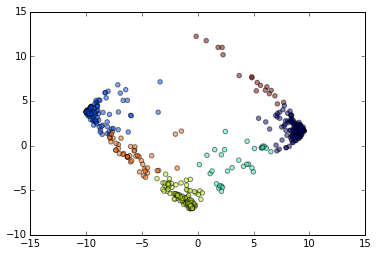

In [166]:
plt.scatter(plot_columns[:, 0], plot_columns[:, 1], c=kmeans.labels_, alpha=0.5)